In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree

import SweetSpotPrediction as ssp

# 02 Base model
A simiple model to help understand the data (and help with feature engineering in 01)

*Note: Run 01 to build the .csv files needed*

In [2]:
df = pd.read_csv('ClassificationData.csv')
df.head()

,Unnamed: 0,XPos,YPos,Thickness,AvgNTG,AvgPerm,AvgPoro,NetPerm,WellProbability,WellPresent
0,0,452000.0,6780600.0,-19.843674,NaN,NaN,NaN,NaN,NaN,0
1,1,452000.0,6780650.0,-17.164212,NaN,NaN,NaN,NaN,NaN,0
2,2,452000.0,6780700.0,-14.827628,NaN,NaN,NaN,NaN,NaN,0
3,3,452000.0,6780750.0,-14.540321,NaN,NaN,NaN,NaN,NaN,0
4,4,452000.0,6780800.0,-15.951475,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df.describe()

,Unnamed: 0,XPos,YPos,Thickness,AvgNTG,AvgPerm,AvgPoro,NetPerm,WellProbability,WellPresent
count,22440.000000,22440.000000,2.244000e+04,20196.000000,15948.000000,16581.000000,16581.000000,15242.000000,16581.000000,22440.000000
mean,11219.500000,455375.000000,6.784700e+06,47.635103,0.421225,268.979913,0.148832,5151.761560,0.081332,0.042647
std,6478.014356,1962.981588,2.381579e+03,72.790268,0.585321,480.604983,0.065639,5904.965672,0.076327,0.202065
min,0.000000,452000.000000,6.780600e+06,-99.220518,-2.716985,-1926.305467,-0.256188,-19704.935208,0.015201,0.000000
25%,5609.750000,453687.500000,6.782650e+06,-12.841424,0.428203,95.082471,0.123295,1173.427178,0.035907,0.000000
50%,11219.500000,455375.000000,6.784700e+06,34.878185,0.601743,156.600477,0.142840,3424.826356,0.058447,0.000000
75%,16829.250000,457062.500000,6.786750e+06,104.958917,0.702460,286.990163,0.163693,7742.928171,0.095726,0.000000
max,22439.000000,458750.000000,6.788800e+06,214.915896,2.565845,3676.099741,0.801105,38487.214756,0.795190,1.000000


In [15]:
# copy paste from 01

features = [
    #'XPos', # propbably dont want these as features
    #'YPos', # propbably dont want these as features
    'Thickness',
    'AvgNTG',
    'AvgPerm',
    'AvgPoro',
    'NetPerm',

]

label_clf = 'WellPresent' 

In [16]:
df.dropna(inplace=True)

In [17]:
X_train, X_, y_train, y_ = train_test_split(df[features], df[label_clf], test_size=0.33, random_state=13)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.50, random_state=42)

# sanity check (SHould get 100% results with xpos and y post)
#X_train = df[features]
#y_train = df[label_clf]

Normalization ommited on purpose

In [18]:
clf = tree.DecisionTreeClassifier(class_weight='balanced')
clf = clf.fit(X_train, y_train)

In [19]:
y_pred_val = clf.predict(X_val)

In [20]:
ssp.ReportMetrics(clf, X_train, X_val, y_train, y_val, y_pred_val)

Weighted accuracy on training set: 1.000
Weighted accuracy on test set: 0.949

Precision: 0.948
Recall: 0.901
F1: 0.924


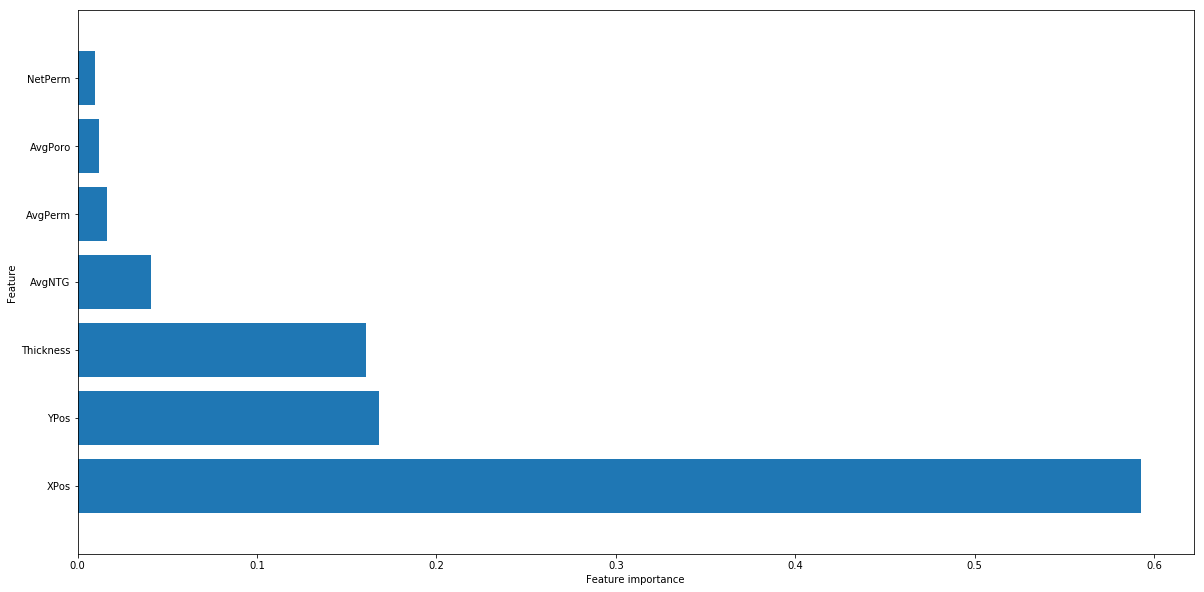

In [21]:
ssp.plot_feature_importances(clf,features)

maybe use
https://graphviz.gitlab.io/_pages/Download/Download_windows.html
to plot disision tree
(need some local path stuff setup, check with marco)

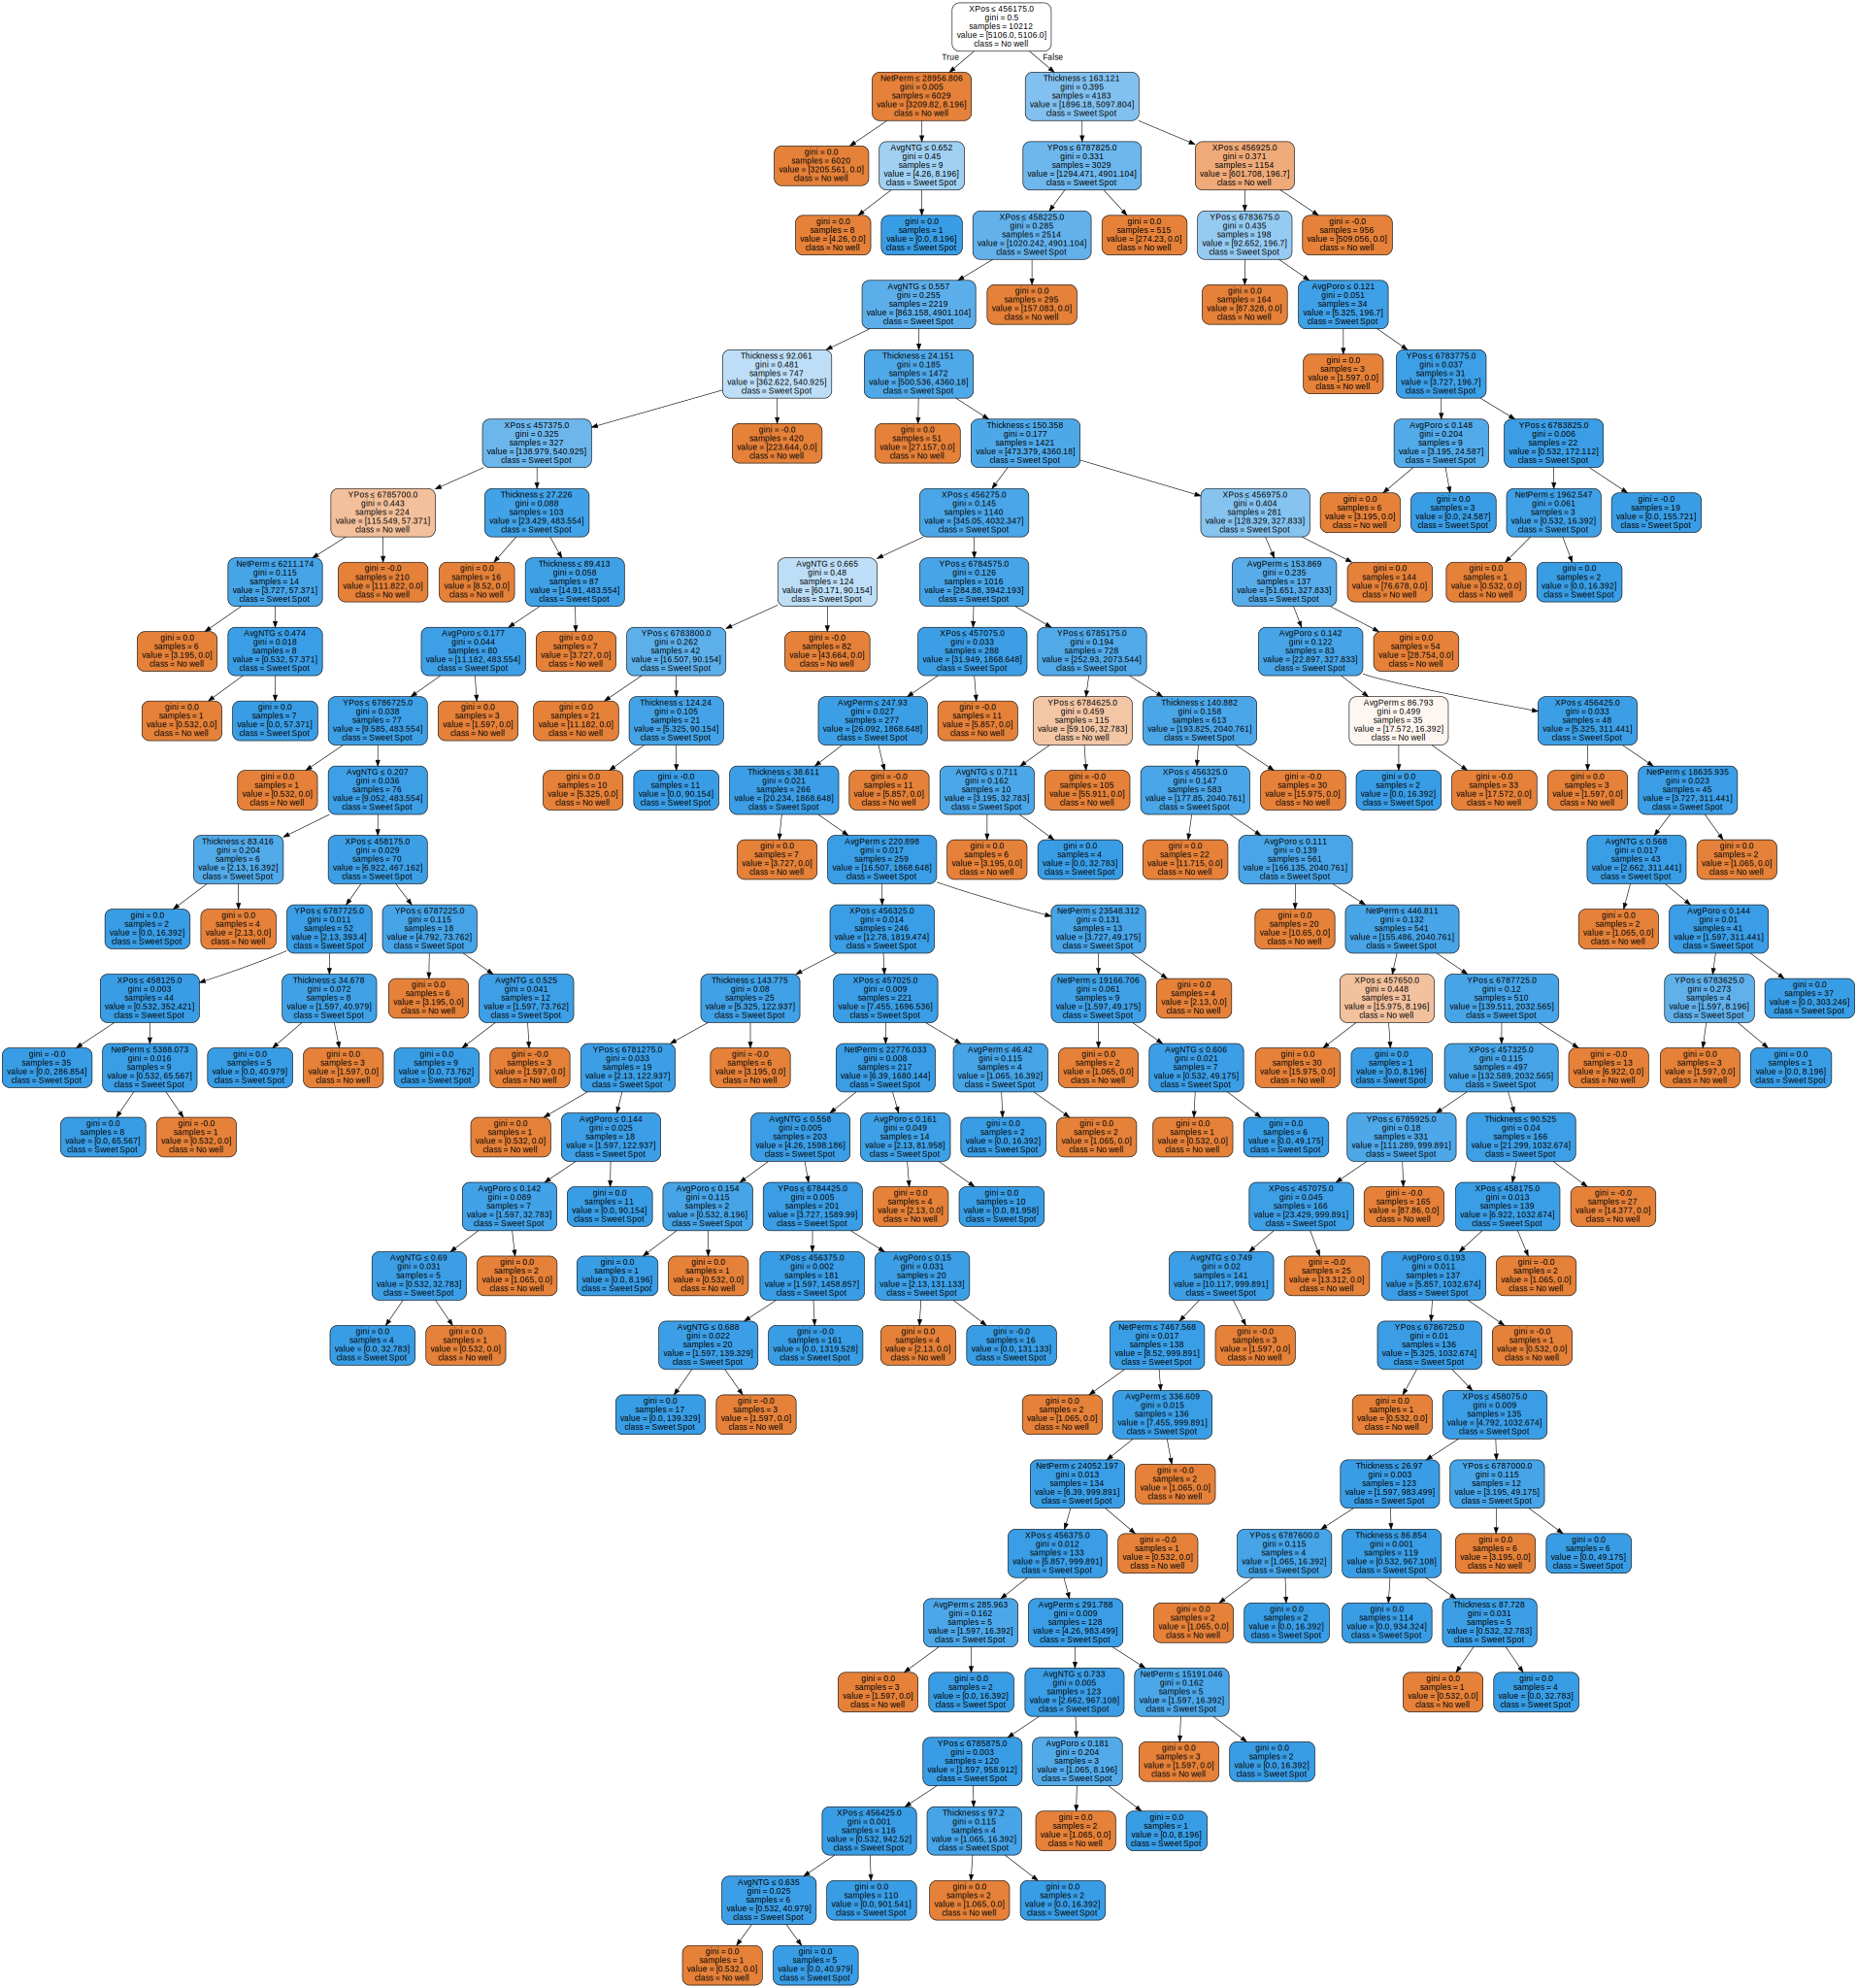

In [22]:
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     class_names=['No well','Sweet Spot'],
                     filled=True, rounded=True,  
                      special_characters=True)  
graphviz.Source(dot_data) 

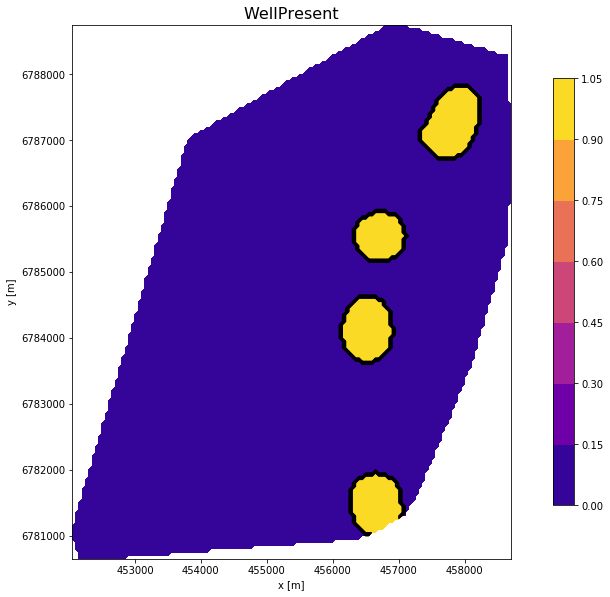

In [23]:
ssp.plot_map(df, label_clf)


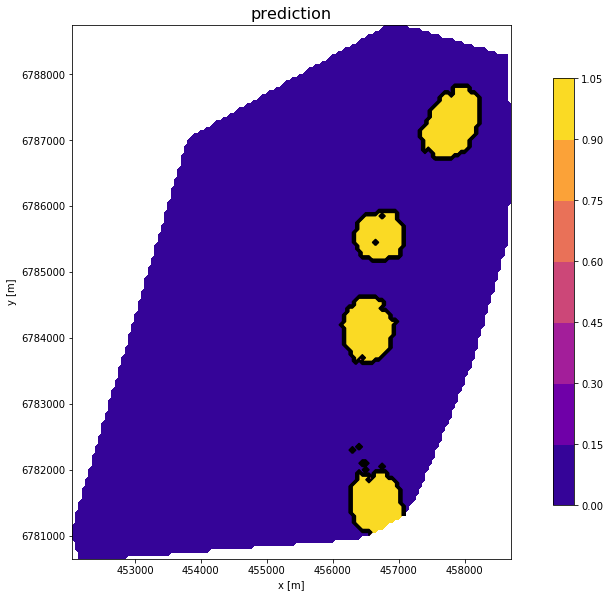

In [24]:
df['prediction'] = clf.predict(df[features])
ssp.plot_map(df, 'prediction')

# lets draw how certain the clasifications are

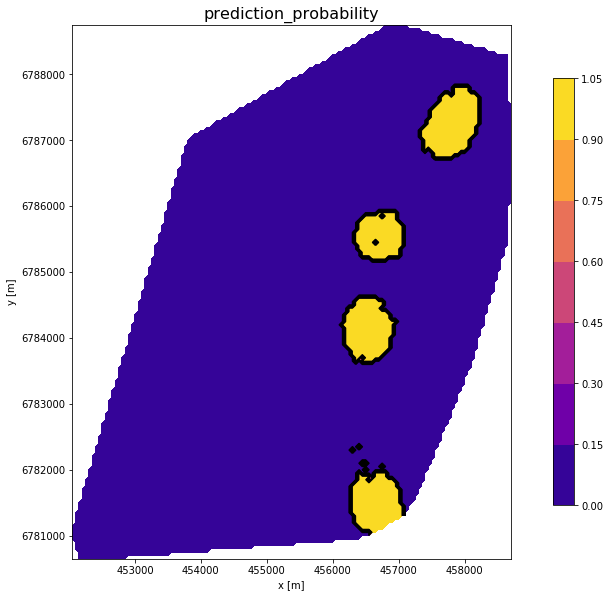

In [25]:
df['prediction_probability'] = clf.predict_proba(df[features])[:,1] # with 1 beeing the probability that there is a sweetspot
ssp.plot_map(df, 'prediction_probability')

# <a href="01 Data Preperation.ipynb">Previous</a> <a href="03 Exploration of models.ipynb">Next</a> Notebook